## Учебный проект - Анализ финансового состояния компании

**Описание ситуации и задача**         
Компания ВТБ собирает средства от множества инвесторов и инвестирует их в различные финансовые инструменты, такие как акции, облигации и другие ценные бумаги.               
Необходимо провести анализ финансового состояния компании, в которые планируются инвестиции, для принятия обоснованных решений стоит ли покупать их акции?            

**Вопросы:**
1) Какая структура собственников у компании?              
2) Какая у компании рыночная капитализация? Как она изменилась за последние 5 лет?                 
3) Какая за последний год выручка у компании? Растет ли она? Какая прибыль? Растет ли прибыль?              
4) Какая у компании выручка и прибыль на 1 акцию? Как менялся этот показатель?            
5) Сколько активов и сколько обязательств у компании? Что растет быстрее?           
6) Рассчитайте показатели мультипликаторы P/E, P/BV, P/S. Сравните эти показатели с другими компаниями по отрасли.       
7) Чему равен ROA, ROE, Net margin? Сравните со средними показателиями в отрасли.


In [ ]:
import pandas as pd

In [ ]:
companies_df = pd.read_csv('companies_data.csv')
companies_df.to_excel('companies_data.xlsx')

# Новый раздел

In [ ]:
#считываем файлы
companies_df = pd.read_csv('companies_data.csv')
companies_df.to_excel('companies_data.xlsx')
companies_df.to_csv('companies_data2.csv', index=False, decimal=',')

owners_df = pd.read_csv('owners_data.csv')
owners_df.to_excel('owners_data.xlsx')
owners_df.to_csv('owners_data2.csv', index=False, decimal=',')

shares_df = pd.read_csv('shares_data.csv')
shares_df.to_excel('shares_data.xlsx')

reports_df = pd.read_csv('reports_data.csv')
reports_df.to_excel('reports_data.xlsx')

Работаем с компанией ВТБ. Код компании - VTBR

In [ ]:
# код компании
code = 'VTBR'

2.1)	Какая структура собственников у компании?

In [ ]:
condition = owners_df['code'] == code
company_owners = owners_df[condition]
company_owners

,Unnamed: 0,code,own,owner,year
47,47,VTBR,60.9,Росимущество,2021
48,48,VTBR,39.1,Прочие,2021


Вывод: Основной владелец - Росимущество (более 60%)

2.2)	Какая у компании рыночная капитализация? Как она изменилась за последние 5 лет?

In [ ]:
# капитализация
shares_df['capitalization'] = shares_df['num'] * shares_df['price'] / 1000000000
# дата из № года и месяца
shares_df['date'] = pd.to_datetime(shares_df[['year', 'month']].assign(day=1))
# оставляем только данные о компании
condition = shares_df['code'] == code
company_shares = shares_df[condition]

# оставляем только данные только о годах с 2019
condition = company_shares['year'] >= 2019
company_shares = company_shares[condition]

# сортировка по дате по убыванию
company_shares.sort_values(by='date', ascending=False)

,Unnamed: 0,code,exchange,month,num,price,year,capitalization,date
1355,1355,VTBR,MOEX,3,26849669465190,0.0226,2024,606.802530,2024-03-01
1354,1354,VTBR,MOEX,12,26849669465190,0.0229,2023,614.857431,2023-12-01
1352,1352,VTBR,MOEX,9,26849669465190,0.0258,2023,692.721472,2023-09-01
1349,1349,VTBR,MOEX,6,26849669465190,0.0216,2023,579.952860,2023-06-01
1348,1348,VTBR,MOEX,3,21703791818409,0.0181,2023,392.838632,2023-03-01
1346,1346,VTBR,MOEX,12,12960541337338,0.0166,2022,215.144986,2022-12-01
1344,1344,VTBR,MOEX,9,12960541337338,0.0147,2022,190.519958,2022-09-01
1342,1342,VTBR,MOEX,6,12960541337338,0.0182,2022,235.881852,2022-06-01
1339,1339,VTBR,MOEX,3,12960541337338,0.0188,2022,243.658177,2022-03-01
1337,1337,VTBR,MOEX,12,12960541337338,0.0482,2021,624.698092,2021-12-01


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num'].plot(kind='hist', bins=20, title='num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='month', y='num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='num', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Unnamed: 0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Unnamed: 0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['num']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('num')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
_df_12['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['num'].plot(kind='line', figsize=(8, 4), title='num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

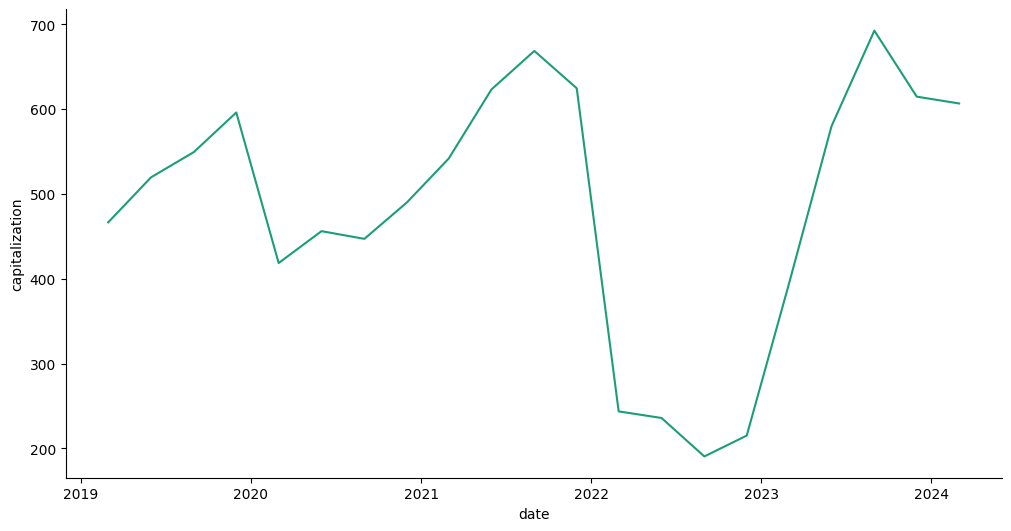

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['capitalization']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('capitalization')

Вывод: Капитализация имела вильный спад в 2022 году, но к концу 2023 превысила докризисный уровень.

2.3)	Какая за последний год выручка у компании? Растет ли она? Какая прибыль? Растет ли прибыль?

In [ ]:
condition = reports_df['code'] == code
company_reports = reports_df[condition]

condition = company_reports['period'] == 'Y'
company_reports = company_reports[condition]

revenues = company_reports[['year', 'revenue','earnings']]
revenues

,year,revenue,earnings
795,2011,332600.0,90500
796,2012,428000.0,90600
797,2013,430800.0,100500
798,2014,547300.0,800
799,2015,459100.0,1700
800,2016,524700.0,51600
801,2017,653900.0,120100
809,2018,693100.0,181500
817,2019,678600.0,201200
825,2020,776100.0,75300


Вывод: Выручка компании в 2023 составила 989 700

2.4)	Какая у компании выручка и прибыль на 1 акцию? Как менялся этот показатель?

In [ ]:
condition = (shares_df['code'] == code) & (shares_df['year'] == 2023)
stocks_num = shares_df[condition]['num'].values[0]
stocks_num

21703791818409

In [ ]:
stocks_mln = stocks_num / 1000000
company_reports['revenue_to_stock'] = company_reports['revenue'] / stocks_mln
company_reports['earning_to_stock'] = company_reports['earnings'] / stocks_mln
revenues = company_reports[['year', 'revenue','earnings','revenue_to_stock','earning_to_stock']]
revenues

,year,revenue,earnings,revenue_to_stock,earning_to_stock
795,2011,332600.0,90500,0.015325,0.004170
796,2012,428000.0,90600,0.019720,0.004174
797,2013,430800.0,100500,0.019849,0.004631
798,2014,547300.0,800,0.025217,0.000037
799,2015,459100.0,1700,0.021153,0.000078
800,2016,524700.0,51600,0.024175,0.002377
801,2017,653900.0,120100,0.030128,0.005534
809,2018,693100.0,181500,0.031935,0.008363
817,2019,678600.0,201200,0.031266,0.009270
825,2020,776100.0,75300,0.035759,0.003469


Вывод: выручка на 1 акцию составляет 0,0456 - значительное увеличение за рассматриваемый период; доход на 1 акцию составляет 0,019914 - значительное увеличение за рассматриваемый период, несмотря на отрицательное значение прошлого года.

2.5)	Сколько активов и сколько обязательств у компании? Что растет быстрее?

In [ ]:
condition = reports_df['code'] == code
company_reports = reports_df[condition]

condition = company_reports['period'] == 'Y'
company_reports = company_reports[condition]

answer = company_reports[['code','year','total_assets','total_liabilities']]

answer['assets_%'] = round(answer['total_assets'].pct_change() * 100,2)
answer['liabilities_%'] = round(answer['total_liabilities'].pct_change() * 100,2)
answer

<ipython-input-15-b82cc9d35d3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['assets_%'] = round(answer['total_assets'].pct_change() * 100,2)
<ipython-input-15-b82cc9d35d3e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['liabilities_%'] = round(answer['total_liabilities'].pct_change() * 100,2)


,code,year,total_assets,total_liabilities,assets_%,liabilities_%
795,VTBR,2011,6789600.0,6164500.0,NaN,NaN
796,VTBR,2012,7415700.0,6649600.0,9.22,7.87
797,VTBR,2013,8768500.0,7821400.0,18.24,17.62
798,VTBR,2014,12190800.0,11059800.0,39.03,41.40
799,VTBR,2015,13641900.0,12187800.0,11.90,10.20
800,VTBR,2016,12588200.0,11175300.0,-7.72,-8.31
801,VTBR,2017,13009300.0,11529600.0,3.35,3.17
809,VTBR,2018,14760600.0,13237600.0,13.46,14.81
817,VTBR,2019,15516100.0,13862800.0,5.12,4.72
825,VTBR,2020,18142200.0,16419600.0,16.93,18.44


Вывод: больше активов

2.6)	Рассчитайте показатели мультипликаторы – P/E , P/BV,  P/S. Сравните эти показатели с другими компаниями по отрасли.

In [ ]:
condition = (reports_df['period'] == 'Y') & (reports_df['year'] == 2023)
year_reports = reports_df[condition]
len(year_reports)

192

In [ ]:
year_reports['code'].unique()

array(['SBER', 'ROSN', 'LKOH', 'NVTK', 'GAZP', 'SIBN', 'GMKN', 'PLZL',
       'SNGS', 'TATN', 'CHMF', 'NLMK', 'YNDX', 'TRNFP', 'VTBR', 'OZON',
       'PHOR', 'IRKT', 'FIVE', 'RUAL', 'UNAC', 'MTSS', 'MAGN', 'AKRN',
       'TCSG', 'ALRS', 'BANE', 'MOEX', 'VSMO', 'IRAO', 'SVCB', 'RTKM',
       'HYDR', 'FLOT', 'ENPG', 'FEES', 'RASP', 'FIXP', 'HHRU', 'CBOM',
       'FESH', 'AFKS', 'NMTP', 'TRMK', 'SMLT', 'AGRO', 'LSNG', 'KZOS',
       'GCHE', 'AFLT', 'ROSB', 'POSI', 'NKNC', 'UWGN', 'SFIN', 'POLY',
       'BSPB', 'MGTS', 'RGSS', 'KAZT', 'GLTR', 'MTLR', 'UPRO', 'LENT',
       'ASTR', 'VKCO', 'KMAZ', 'UTAR', 'KUBE', 'LEAS', 'LSRG', 'BELU',
       'USBN', 'MDMG', 'GEMC', 'YAKG', 'AQUA', 'MBNK', 'MRKS', 'SELG',
       'NKHP', 'MSRS', 'CIAN', 'DIAS', 'MFGS', 'MSTT', 'RENI', 'RNFT',
       'OMZZP', 'SGZH', 'UKUZ', 'DELI', 'RKKE', 'MRKU', 'SOFL', 'MRKP',
       'ETLN', 'MVID', 'ROLO', 'VSYD', 'WUSH', 'JNOS', 'HNFG', 'SVAV',
       'ABRD', 'CHMK', 'KROT', 'MRKC', 'ZAYM', 'NNSB', 'ELFV', 'TGKN',
    

In [ ]:
condition = (shares_df['year'] == 2023)&(shares_df['month'] == 12)
task_shares = shares_df[condition]
task_shares

,Unnamed: 0,code,exchange,month,num,price,year,capitalization,date
96,96,SBER,MOEX,12,21586948000,271.5800,2023,5862.583338,2023-12-01
97,97,SBERP,MOEX,12,1000000000,272.4900,2023,272.490000,2023-12-01
196,196,SBER,MOEX,12,21586948000,271.5800,2023,5862.583338,2023-12-01
197,197,SBERP,MOEX,12,1000000000,272.4900,2023,272.490000,2023-12-01
296,296,SBER,MOEX,12,21586948000,271.5800,2023,5862.583338,2023-12-01
...,...,...,...,...,...,...,...,...,...
15634,15634,KUZB,MOEX,12,22503490875,0.0469,2023,1.055414,2023-12-01
15683,15683,MRSB,MOEX,12,1345037710,0.7910,2023,1.063925,2023-12-01
15715,15715,SVET,MOEX,12,22333500,25.1000,2023,0.560571,2023-12-01
15716,15716,SVETP,MOEX,12,2481500,1.0000,2023,0.002482,2023-12-01


In [ ]:
year_reports = pd.merge(year_reports, task_shares[['code','year','capitalization']], how='left' )

year_reports['capitalization'] = year_reports['capitalization'] * 1000


In [ ]:
year_reports['code'].unique()

array(['SBER', 'ROSN', 'LKOH', 'NVTK', 'GAZP', 'SIBN', 'GMKN', 'PLZL',
       'SNGS', 'TATN', 'CHMF', 'NLMK', 'YNDX', 'TRNFP', 'VTBR', 'OZON',
       'PHOR', 'IRKT', 'FIVE', 'RUAL', 'UNAC', 'MTSS', 'MAGN', 'AKRN',
       'TCSG', 'ALRS', 'BANE', 'MOEX', 'VSMO', 'IRAO', 'SVCB', 'RTKM',
       'HYDR', 'FLOT', 'ENPG', 'FEES', 'RASP', 'FIXP', 'HHRU', 'CBOM',
       'FESH', 'AFKS', 'NMTP', 'TRMK', 'SMLT', 'AGRO', 'LSNG', 'KZOS',
       'GCHE', 'AFLT', 'ROSB', 'POSI', 'NKNC', 'UWGN', 'SFIN', 'POLY',
       'BSPB', 'MGTS', 'RGSS', 'KAZT', 'GLTR', 'MTLR', 'UPRO', 'LENT',
       'ASTR', 'VKCO', 'KMAZ', 'UTAR', 'KUBE', 'LEAS', 'LSRG', 'BELU',
       'USBN', 'MDMG', 'GEMC', 'YAKG', 'AQUA', 'MBNK', 'MRKS', 'SELG',
       'NKHP', 'MSRS', 'CIAN', 'DIAS', 'MFGS', 'MSTT', 'RENI', 'RNFT',
       'OMZZP', 'SGZH', 'UKUZ', 'DELI', 'RKKE', 'MRKU', 'SOFL', 'MRKP',
       'ETLN', 'MVID', 'ROLO', 'VSYD', 'WUSH', 'JNOS', 'HNFG', 'SVAV',
       'ABRD', 'CHMK', 'KROT', 'MRKC', 'ZAYM', 'NNSB', 'ELFV', 'TGKN',
    

In [ ]:
year_reports = pd.merge(year_reports, companies_df[['code','name','industry']],how='inner' )
year_reports

,Unnamed: 0,accounts_payable,accounts_payable_current,accounts_payable_long,accounts_receivable,accounts_receivable_current,accounts_receivable_long,amount,capex,cash_and_equiv,...,share_premium,total_assets,total_debt,total_expenses,total_liabilities,type,year,capitalization,name,industry
0,47,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN,3616900.0,...,320300.0,52307200.0,NaN,NaN,45722800.0,МСФО,2023,5.862583e+06,Сбербанк,Банковская деятельность
1,47,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN,3616900.0,...,320300.0,52307200.0,NaN,NaN,45722800.0,МСФО,2023,5.862583e+06,Сбербанк,Банковская деятельность
2,47,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN,3616900.0,...,320300.0,52307200.0,NaN,NaN,45722800.0,МСФО,2023,5.862583e+06,Сбербанк,Банковская деятельность
3,97,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN,3616900.0,...,320300.0,52307200.0,NaN,NaN,45722800.0,МСФО,2023,5.862583e+06,Сбербанк,Банковская деятельность
4,97,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN,3616900.0,...,320300.0,52307200.0,NaN,NaN,45722800.0,МСФО,2023,5.862583e+06,Сбербанк,Банковская деятельность
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,7375,562026.0,562026.0,NaN,126162.0,126162.0,NaN,1000,668608.0,59990.0,...,NaN,3699932.0,623000.0,NaN,1185026.0,МСФО,2023,1.389081e+03,ДЗРД,Производство электрооборудования
255,7416,5040.0,NaN,NaN,8920.0,NaN,NaN,1000,NaN,354.0,...,15645.0,323778.0,NaN,NaN,21247.0,МСФО,2023,1.363227e+03,Арсагера,Деятельность на рынках капитала
256,7448,87089.0,87089.0,NaN,420854.0,420854.0,NaN,1000,35033.0,34122.0,...,NaN,1347115.0,NaN,292126.0,220430.0,МСФО,2023,1.508835e+03,Завод ДИОД,Производство медицинского оборудования и товар...
257,7480,299693.0,299693.0,NaN,409425.0,409425.0,NaN,1000,142873.0,20729.0,...,NaN,1502868.0,NaN,367765.0,743440.0,МСФО,2023,1.168308e+03,ВХЗ,Химическое производство


In [ ]:

task_df = year_reports[['code','year','name','industry','capitalization','earnings','equity','revenue']]

task_df = task_df.drop_duplicates()
task_df

,code,year,name,industry,capitalization,earnings,equity,revenue
0,SBER,2023,Сбербанк,Банковская деятельность,5.862583e+06,1508600,6584400.0,3639300.0
9,ROSN,2023,Роснефть,"Добыча нефти, газа и потребляемого топлива",6.277831e+06,1529,8414.0,9163.0
10,LKOH,2023,ЛУКОЙЛ,"Добыча нефти, газа и потребляемого топлива",4.680308e+06,1160271,6401233.0,7928303.0
11,NVTK,2023,Новатэк,"Добыча нефти, газа и потребляемого топлива",4.448188e+06,469487,2605632.0,1371508.0
12,GAZP,2023,ГАЗПРОМ,"Добыча нефти, газа и потребляемого топлива",3.790366e+06,-583076,16452714.0,8541818.0
...,...,...,...,...,...,...,...,...
251,DZRD,2023,ДЗРД,Производство электрооборудования,1.389081e+03,-372944,2514906.0,3261778.0
255,ARSA,2023,Арсагера,Деятельность на рынках капитала,1.363227e+03,108773,302531.0,62217.0
256,DIOD,2023,Завод ДИОД,Производство медицинского оборудования и товар...,1.508835e+03,8418,1126685.0,548817.0
257,VLHZ,2023,ВХЗ,Химическое производство,1.168308e+03,238113,759428.0,3901297.0


In [ ]:
task_df['code'].unique()

array(['SBER', 'ROSN', 'LKOH', 'NVTK', 'GAZP', 'SIBN', 'GMKN', 'PLZL',
       'SNGS', 'TATN', 'CHMF', 'NLMK', 'YNDX', 'VTBR', 'OZON', 'PHOR',
       'IRKT', 'FIVE', 'RUAL', 'UNAC', 'MTSS', 'MAGN', 'AKRN', 'TCSG',
       'ALRS', 'BANE', 'MOEX', 'VSMO', 'IRAO', 'SVCB', 'RTKM', 'HYDR',
       'FLOT', 'ENPG', 'FEES', 'RASP', 'FIXP', 'HHRU', 'CBOM', 'FESH',
       'AFKS', 'NMTP', 'TRMK', 'SMLT', 'AGRO', 'LSNG', 'KZOS', 'GCHE',
       'AFLT', 'ROSB', 'POSI', 'NKNC', 'UWGN', 'SFIN', 'POLY', 'BSPB',
       'MGTS', 'RGSS', 'KAZT', 'GLTR', 'MTLR', 'UPRO', 'LENT', 'ASTR',
       'VKCO', 'KMAZ', 'UTAR', 'KUBE', 'LEAS', 'LSRG', 'BELU', 'USBN',
       'MDMG', 'GEMC', 'YAKG', 'AQUA', 'MBNK', 'MRKS', 'SELG', 'NKHP',
       'MSRS', 'CIAN', 'DIAS', 'MFGS', 'MSTT', 'RENI', 'RNFT', 'SGZH',
       'UKUZ', 'DELI', 'RKKE', 'MRKU', 'SOFL', 'ETLN', 'MVID', 'ROLO',
       'VSYD', 'WUSH', 'JNOS', 'HNFG', 'SVAV', 'ABRD', 'CHMK', 'KROT',
       'MRKC', 'ZAYM', 'NNSB', 'ELFV', 'TGKN', 'LPSB', 'WTCM', 'TGKB',
      

In [ ]:
condition = task_df['code'] == code
my_industry = task_df[condition]['industry'].values[0]
my_industry

'Банковская деятельность'

In [ ]:
# только компании из нужной отрасли
condition = task_df['industry'] == my_industry
industry_df = task_df[condition]
industry_df

,code,year,name,industry,capitalization,earnings,equity,revenue
0,SBER,2023,Сбербанк,Банковская деятельность,5.862583e+06,1508600,6584400.0,3639300.0
27,VTBR,2023,ВТБ,Банковская деятельность,6.148574e+05,432200,2164300.0,989700.0
37,TCSG,2023,ТКС Холдинг,Банковская деятельность,6.398703e+05,80932,283915.0,361179.0
46,SVCB,2023,Совкомбанк,Банковская деятельность,2.829897e+05,95036,298357.0,180810.0
58,CBOM,2023,МКБ,Банковская деятельность,2.678388e+05,59778,347932.0,140472.0
75,ROSB,2023,Росбанк,Банковская деятельность,1.529682e+05,28813,226250.0,83360.0
84,BSPB,2023,БСП,Банковская деятельность,1.000801e+05,47315,173892.0,67123.0
112,USBN,2023,Банк УРАЛСИБ,Банковская деятельность,5.344399e+04,8174777,116610033.0,80402253.0
117,MBNK,2023,МТС Банк,Банковская деятельность,7.507266e+04,12457265,76292355.0,66884731.0


In [ ]:
# показатели
industry_df.loc[:, 'p/e'] = industry_df['capitalization'] / industry_df['earnings']
industry_df.loc[:, 'p/bv'] = industry_df['capitalization'] / industry_df['equity']
industry_df.loc[:, 'p/s'] = industry_df['capitalization'] / industry_df['revenue']

industry_df

<ipython-input-27-5dc2b115c6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df.loc[:, 'p/e'] = industry_df['capitalization'] / industry_df['earnings']
<ipython-input-27-5dc2b115c6c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_df.loc[:, 'p/bv'] = industry_df['capitalization'] / industry_df['equity']
<ipython-input-27-5dc2b115c6c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,code,year,name,industry,capitalization,earnings,equity,revenue,p/e,p/bv,p/s
0,SBER,2023,Сбербанк,Банковская деятельность,5.862583e+06,1508600,6584400.0,3639300.0,3.886109,0.890375,1.610910
27,VTBR,2023,ВТБ,Банковская деятельность,6.148574e+05,432200,2164300.0,989700.0,1.422622,0.284091,0.621256
37,TCSG,2023,ТКС Холдинг,Банковская деятельность,6.398703e+05,80932,283915.0,361179.0,7.906270,2.253739,1.771615
46,SVCB,2023,Совкомбанк,Банковская деятельность,2.829897e+05,95036,298357.0,180810.0,2.977711,0.948494,1.565122
58,CBOM,2023,МКБ,Банковская деятельность,2.678388e+05,59778,347932.0,140472.0,4.480559,0.769802,1.906706
75,ROSB,2023,Росбанк,Банковская деятельность,1.529682e+05,28813,226250.0,83360.0,5.309000,0.676103,1.835031
84,BSPB,2023,БСП,Банковская деятельность,1.000801e+05,47315,173892.0,67123.0,2.115188,0.575530,1.490996
112,USBN,2023,Банк УРАЛСИБ,Банковская деятельность,5.344399e+04,8174777,116610033.0,80402253.0,0.006538,0.000458,0.000665
117,MBNK,2023,МТС Банк,Банковская деятельность,7.507266e+04,12457265,76292355.0,66884731.0,0.006026,0.000984,0.001122


Вывод: показатели ниже большинства других

2.7)	Чему равен ROE, ROA у компании и Net margin? Сравните со средними показателями в отрасли.

In [ ]:
task_df = year_reports[['code','year','name','industry','earnings','equity','revenue','total_assets']]

task_df = task_df.drop_duplicates()
task_df

,code,year,name,industry,earnings,equity,revenue,total_assets
0,SBER,2023,Сбербанк,Банковская деятельность,1508600,6584400.0,3639300.0,52307200.0
9,ROSN,2023,Роснефть,"Добыча нефти, газа и потребляемого топлива",1529,8414.0,9163.0,18787.0
10,LKOH,2023,ЛУКОЙЛ,"Добыча нефти, газа и потребляемого топлива",1160271,6401233.0,7928303.0,8600173.0
11,NVTK,2023,Новатэк,"Добыча нефти, газа и потребляемого топлива",469487,2605632.0,1371508.0,3219153.0
12,GAZP,2023,ГАЗПРОМ,"Добыча нефти, газа и потребляемого топлива",-583076,16452714.0,8541818.0,28713748.0
...,...,...,...,...,...,...,...,...
251,DZRD,2023,ДЗРД,Производство электрооборудования,-372944,2514906.0,3261778.0,3699932.0
255,ARSA,2023,Арсагера,Деятельность на рынках капитала,108773,302531.0,62217.0,323778.0
256,DIOD,2023,Завод ДИОД,Производство медицинского оборудования и товар...,8418,1126685.0,548817.0,1347115.0
257,VLHZ,2023,ВХЗ,Химическое производство,238113,759428.0,3901297.0,1502868.0


In [ ]:
# показатели
task_df.loc[:, 'roe'] = task_df['earnings'] / task_df['equity']
task_df.loc[:, 'roa'] = task_df['earnings'] / task_df['total_assets']
task_df.loc[:, 'net_margin'] = task_df['earnings'] / task_df['revenue']

In [ ]:
# данные по отрасли
grouped_data = task_df.groupby(by='industry').agg({
    'roe': 'mean','roa':'mean', 'net_margin': 'mean'
})
grouped_data = grouped_data.reset_index()
grouped_data

,industry,roe,roa,net_margin
0,Аэрокосмическая и оборонная промышленность,-0.206305,-0.008400,-0.033995
1,Банковская деятельность,0.204116,0.024254,0.373882
2,Биотехнологии,0.199703,0.076514,0.142236
3,"Деятельность гостиниц, ресторанов и мест отдыха",-0.044242,0.014876,0.015600
4,Деятельность морского транспорта,0.232245,0.157176,0.313642
5,Деятельность на рынках капитала,0.206331,0.106861,1.459531
6,Деятельность наземного транспорта,0.822216,0.297598,0.391512
7,Деятельность организаций и служб здравоохранения,0.394082,0.245758,0.334202
8,Деятельность производителей и поставщиков элек...,0.383462,0.195890,0.058742
9,"Добыча нефти, газа и потребляемого топлива",0.104459,0.078082,1.390884


In [ ]:
# наша отрасль
condition = task_df['code'] == code
my_industry = task_df[condition]['industry'].values[0]
condition = grouped_data['industry'] == my_industry
industry_data = grouped_data[condition]
industry_data

,industry,roe,roa,net_margin
1,Банковская деятельность,0.204116,0.024254,0.373882


In [ ]:
# данные компании
company_data = task_df[task_df['code']==code]
company_data = company_data[['code','roe','roa','net_margin']]
company_data

,code,roe,roa,net_margin
27,VTBR,0.199695,0.01471,0.436698


In [ ]:
# сопоставляем данные отрасли и компании
industry_data = industry_data.rename(columns={'industry': 'code'})

combined_data = pd.concat([industry_data, company_data])
combined_data

,code,roe,roa,net_margin
1,Банковская деятельность,0.204116,0.024254,0.373882
27,VTBR,0.199695,0.014710,0.436698


Вывод: показатели roe и roa меньше чем на рынке, показатель net_margin значительно больше